# 本来開裂するSpike proteinの前処理データを作成する．

In [1]:
#1
import re
import numpy as np
import glob
import random
import os
import matplotlib.pyplot as plt
import numpy as np

#ライブラリのインポート
import pandas as pd
from urllib.request import urlopen
import numpy as np
from lxml import etree

In [2]:
#31
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
import datetime

from tensorflow.keras.callbacks import EarlyStopping

#for tentsorboard
import tensorflow.keras.callbacks
#import tensorflow.keras.backend.tensorflow_backend as KTF
import tensorflow.keras.backend as KTF

from tensorflow.keras.models import load_model

#Vurnum = 実験番号
Vernum = 99

import os

In [3]:
#ここからはじまる．
import mysql.connector as mydb

# コネクションの作成
conn = mydb.connect(
    host='localhost',
    port='3306',　#クオーテーションを外してint型にすべきときもある
    user='XXXXXXX', #3b00001など自分のユーザー名
    password='XXXXXXXX', #ユーザーパスワード
    database='meropsrefs01'
)

In [4]:
# DB操作用にカーソルを作成
cur = conn.cursor()

In [5]:
uid_eg = 'P78365'

def aaseq_from_uid(uid, substrate_turn, index):
    df = pd.DataFrame(np.arange(3).reshape(1, 3), columns=['uniprotKB_accession', 'function', 'sequence'], index=['protease'+str(substrate_turn)+'_substrate'+str(index)])

    for column_name in df:
        df[column_name] = df[column_name].astype(str)

    df['uniprotKB_accession'][0] = uid

    #display(df)    

    url = "https://www.uniprot.org/uniprot/" + uid + ".xml"
    f = urlopen(url)
    xml = f.read()
    root = etree.fromstring(xml)
    
    #以下のコードは下の説明を参照
    function = root.find('./entry/comment[@type="function"]', root.nsmap)
    if function==None:
        print("function was not detected.")
        pass
    else:
        df["function"][0] = function[0].text
        #print(function[0].text+"¥n")

    sequence = root.find('./entry/sequence', root.nsmap) 
    if sequence==None: 
        print("sequence was not detected.")
        pass 
    else: 
        df["sequence"][0] = sequence.text 
        #print(sequence.text+"¥n")

    display(df) 
    return df["sequence"][0]

In [6]:
def get_cleave_pattern(p4_column):
    seq = ""
    three_aa = ""
    for j in range(8):
        three_aa = str(df.iloc[i, p4_column+j])
        print(f'three_aa: {three_aa}')
        
        #print(one_aa) 
        if three_aa == "Ala":
            one_aa = "A"
        elif three_aa == "Cys":
            one_aa = "C"
        elif three_aa == "Asp":
            one_aa = "D"
        elif three_aa == "Glu":
            one_aa = "E"
        elif three_aa == "Phe":
            one_aa = "F"
        elif three_aa == "Gly":
            one_aa = "G"
        elif three_aa == "His":
            one_aa = "H"
        elif three_aa == "Ile":
            one_aa = "I"
        elif three_aa == "Lys":
            one_aa = "K"
        elif three_aa == "Leu":
            one_aa = "L"
        elif three_aa == "Met":
            one_aa = "M"
        elif three_aa == "Asn":
            one_aa = "N"
        elif three_aa == "Pro":
            one_aa = "P"
        elif three_aa == "Gln":
            one_aa = "Q"
        elif three_aa == "Arg":
            one_aa = "R"
        elif three_aa == "Ser":
            one_aa = "S"
        elif three_aa == "Thr":
            one_aa = "T"
        elif three_aa == "Val":
            one_aa = "V"
        elif three_aa == "Trp":
            one_aa = "W"
        elif three_aa == "Tyr":
            one_aa = "Y"
        else:
            print("This is not a major amino acid or \"- \".")
            print(f'This is {three_aa}.')
            one_aa = "-"
            pass 
        print(f'one_aa: {one_aa}')
        seq = seq + one_aa
    print("cleave_pattern: "+seq)
    return seq

In [7]:
def aa_charge(e, cleave_pattern):
    for j in range(8):   
        one_char_aa = cleave_pattern[j]
        if one_char_aa == "A":
            x_train[e][0][j][0] = charge["A"]
        elif one_char_aa == "C":
            x_train[e][0][j][0] = charge["C"]
        elif one_char_aa == "D":
            x_train[e][0][j][0] = charge["D"]
        elif one_char_aa == "E":
            x_train[e][0][j][0] = charge["E"]
        elif one_char_aa == "F":
            x_train[e][0][j][0] = charge["F"]
        elif one_char_aa == "G":
            x_train[e][0][j][0] = charge["G"]
        elif one_char_aa == "H":
            x_train[e][0][j][0] = charge["H"]
        elif one_char_aa == "I":
            x_train[e][0][j][0] = charge["I"]
        elif one_char_aa == "K":
            x_train[e][0][j][0] = charge["K"]
        elif one_char_aa == "L":
            x_train[e][0][j][0] = charge["L"]
        elif one_char_aa == "M":
            x_train[e][0][j][0] = charge["M"]
        elif one_char_aa == "N":
            x_train[e][0][j][0] = charge["N"]
        elif one_char_aa == "P":
            x_train[e][0][j][0] = charge["P"]
        elif one_char_aa == "Q":
            x_train[e][0][j][0] = charge["Q"]
        elif one_char_aa == "R":
            x_train[e][0][j][0] = charge["R"]
        elif one_char_aa == "S":
            x_train[e][0][j][0] = charge["S"]
        elif one_char_aa == "T":
            x_train[e][0][j][0] = charge["T"]
        elif one_char_aa == "V":
            x_train[e][0][j][0] = charge["V"]
        elif one_char_aa == "W":
            x_train[e][0][j][0] = charge["W"]
        elif one_char_aa == "Y":
            x_train[e][0][j][0] = charge["Y"]
        else:
            pass

In [8]:
def aa_hypho(e, cleave_pattern):
    for j in range(8):
        one_char_aa = cleave_pattern[j]
        if one_char_aa == "A":
            x_train[e][1][j][0] = hydrophobicity["A"]
        elif one_char_aa == "C":
            x_train[e][1][j][0] = hydrophobicity["C"]
        elif one_char_aa == "D":
            x_train[e][1][j][0] = hydrophobicity["D"]
        elif one_char_aa == "E":
            x_train[e][1][j][0] = hydrophobicity["E"]
        elif one_char_aa == "F":
            x_train[e][1][j][0] = hydrophobicity["F"]
        elif one_char_aa == "G":
            x_train[e][1][j][0] = hydrophobicity["G"]
        elif one_char_aa == "H":
            x_train[e][1][j][0] = hydrophobicity["H"]
        elif one_char_aa == "I":
            x_train[e][1][j][0] = hydrophobicity["I"]
        elif one_char_aa == "K":
            x_train[e][1][j][0] = hydrophobicity["K"]
        elif one_char_aa == "L":
            x_train[e][1][j][0] = hydrophobicity["L"]
        elif one_char_aa == "M":
            x_train[e][1][j][0] = hydrophobicity["M"]
        elif one_char_aa == "N":
            x_train[e][1][j][0] = hydrophobicity["N"]
        elif one_char_aa == "P":
            x_train[e][1][j][0] = hydrophobicity["P"]
        elif one_char_aa == "Q":
            x_train[e][1][j][0] = hydrophobicity["Q"]
        elif one_char_aa == "R":
            x_train[e][1][j][0] = hydrophobicity["R"]
        elif one_char_aa == "S":
            x_train[e][1][j][0] = hydrophobicity["S"]
        elif one_char_aa == "T":
            x_train[e][1][j][0] = hydrophobicity["T"]
        elif one_char_aa == "V":
            x_train[e][1][j][0] = hydrophobicity["V"]
        elif one_char_aa == "W":
            x_train[e][1][j][0] = hydrophobicity["W"]
        elif one_char_aa == "Y":
            x_train[e][1][j][0] = hydrophobicity["Y"]
        else:
            pass    

In [9]:
#https://trade-and-develop.hatenablog.com/entry/2017/02/23/021119
cur = conn.cursor(buffered=True)

In [10]:
#adding secoundary structure
def add_secoundary_structure(e, uid, p4, cleave_pattern):
    uid = [uid]
    cur.execute("SELECT substrate_2d FROM substrate_2d where uniprot_acc=(%s);", uid)  
    ss = cur.fetchall()
    if not ss:
        print("substrate_2d is empty.")
        return 0    
    else:
        print(ss)
    ssl=list(ss[0][0])

    for j in range(8):
        one_char_aa = cleave_pattern[j]
        if p4-1 +j < 0:
            continue
        if p4-1+j > len(ssl)-1:
            return 0
        if ssl[p4-1 + j] == 'a':
            if one_char_aa == "A":
                x_train[e][2][j][0]= 1
            elif one_char_aa == "C":
                x_train[e][2][j][0] = 1
            elif one_char_aa == "D":
                x_train[e][2][j][0] = 1
            elif one_char_aa == "E":
                x_train[e][2][j][0] = 1
            elif one_char_aa == "F":
                x_train[e][2][j][0] = 1
            elif one_char_aa == "G":
                x_train[e][2][j][0] = 1
            elif one_char_aa == "H":
                x_train[e][2][j][0] = 1
            elif one_char_aa == "I":
                x_train[e][2][j][0] = 1
            elif one_char_aa == "K":
                x_train[e][2][j][0] = 1
            elif one_char_aa == "L":
                x_train[e][2][j][0] = 1
            elif one_char_aa == "M":
                x_train[e][2][j][0] = 1
            elif one_char_aa == "N":
                x_train[e][2][j][0] = 1
            elif one_char_aa == "P":
                x_train[e][2][j][0] = 1
            elif one_char_aa == "Q":
                x_train[e][2][j][0] = 1
            elif one_char_aa == "R":
                x_train[e][2][j][0] = 1
            elif one_char_aa == "S":
                x_train[e][2][j][0] = 1
            elif one_char_aa == "T":
                x_train[e][2][j][0] = 1
            elif one_char_aa == "V":
                x_train[e][2][j][0] = 1
            elif one_char_aa == "W":
                x_train[e][2][j][0] = 1
            elif one_char_aa == "Y":
                x_train[e][2][j][0] = 1
        elif ssl[p4-1 + j] =='b':
            if one_char_aa == "A":
                x_train[e][3][j][0] = 1
            elif one_char_aa == "C":
                x_train[e][3][j][0] =1
            elif one_char_aa == "D":
                x_train[e][3][j][0] = 1
            elif one_char_aa == "E":
                x_train[e][3][j][0] = 1
            elif one_char_aa == "F":
                x_train[e][3][j][0] = 1
            elif one_char_aa == "G":
                x_train[e][3][j][0] = 1
            elif one_char_aa == "H":
                x_train[e][3][j][0] = 1
            elif one_char_aa == "I":
                x_train[e][3][j][0] = 1
            elif one_char_aa == "K":
                x_train[e][3][j][0] = 1
            elif one_char_aa == "L":
                x_train[e][3][j][0] = 1
            elif one_char_aa == "M":
                x_train[e][3][j][0] = 1
            elif one_char_aa == "N":
                x_train[e][3][j][0] = 1
            elif one_char_aa == "P":
                x_train[e][3][j][0] = 1
            elif one_char_aa == "Q":
                x_train[e][3][j][0] = 1
            elif one_char_aa == "R":
                x_train[e][3][j][0] = 1
            elif one_char_aa == "S":
                x_train[e][3][j][0] = 1
            elif one_char_aa == "T":
                x_train[e][3][j][0] = 1
            elif one_char_aa == "V":
                x_train[e][3][j][0] = 1
            elif one_char_aa == "W":
                x_train[e][3][j][0] = 1
            elif one_char_aa == "Y":
                x_train[e][3][j][0] = 1
        else:
            pass    

In [11]:
#https://www.sigmaaldrich.com/JP/ja/technical-documents/technical-article/protein-biology/protein-structural-analysis/amino-acid-reference-chart
df_aap = pd.read_table('../amino_acids_properties/amino_acid_info_merck.tsv', index_col=0)
print(df_aap)

                  3Letter 1Letter  MolecularWeight MolecularFormula  \
name                                                                  
Alanine               Ala       A            89.10          C3H7NO2   
Arginine              Arg       R           174.20        C6H14N4O2   
Asparagine            Asn       N           132.12         C4H8N2O3   
Aspartic acid         Asp       D           133.11          C4H7NO4   
Cysteine              Cys       C           121.16         C3H7NO2S   
Glutamic acid         Glu       E           147.13          C5H9NO4   
Glutamine             Gln       Q           146.15        C5H10N2O3   
Glycine               Gly       G            75.07          C2H5NO2   
Histidine             His       H           155.16         C6H9N3O2   
Hydroxyproline        Hyp       O           131.13          C5H9NO3   
Isoleucine            Ile       I           131.18         C6H13NO2   
Leucine               Leu       L           131.18         C6H13NO2   
Lysine

In [12]:
def aa_properties(e, cleave_pattern):
    for j in range(8):
        one_char_aa = cleave_pattern[j]
        if one_char_aa == "A":
            x_train[e][4][j][0] = df_aap.at['Alanine', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Alanine', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Alanine', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Alanine', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Alanine', 'pl']
            x_train[e][9][j][0] = df_aap.at['Alanine', 'C']
            x_train[e][10][j][0] = df_aap.at['Alanine', 'H']
            x_train[e][11][j][0] = df_aap.at['Alanine', 'N']
            x_train[e][12][j][0] = df_aap.at['Alanine', 'O']
            x_train[e][13][j][0] = df_aap.at['Alanine', 'S']
        elif one_char_aa == "C":
            #x_train[e][12][j][0][2] = hydrophobicity["C"]
            x_train[e][4][j][0] = df_aap.at['Cysteine', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Cysteine', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Cysteine', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Cysteine', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Cysteine', 'pl']
            x_train[e][9][j][0] = df_aap.at['Cysteine', 'C']
            x_train[e][10][j][0] = df_aap.at['Cysteine', 'H']
            x_train[e][11][j][0] = df_aap.at['Cysteine', 'N']
            x_train[e][12][j][0] = df_aap.at['Cysteine', 'O']
            x_train[e][13][j][0] = df_aap.at['Cysteine', 'S']
        elif one_char_aa == "D":
            #x_train[e][15][j][0][2] = hydrophobicity["D"]
            x_train[e][4][j][0] = df_aap.at['Aspartic acid', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Aspartic acid', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Aspartic acid', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Aspartic acid', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Aspartic acid', 'pl']
            x_train[e][9][j][0] = df_aap.at['Aspartic acid', 'C']
            x_train[e][10][j][0] = df_aap.at['Aspartic acid', 'H']
            x_train[e][11][j][0] = df_aap.at['Aspartic acid', 'N']
            x_train[e][12][j][0] = df_aap.at['Aspartic acid', 'O']
            x_train[e][13][j][0] = df_aap.at['Aspartic acid', 'S']
        elif one_char_aa == "E":
            #x_train[e][16][j][0][2] = hydrophobicity["E"]
            x_train[e][4][j][0] = df_aap.at['Glutamic acid', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Glutamic acid', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Glutamic acid', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Glutamic acid', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Glutamic acid', 'pl']
            x_train[e][9][j][0] = df_aap.at['Glutamic acid', 'C']
            x_train[e][10][j][0] = df_aap.at['Glutamic acid', 'H']
            x_train[e][11][j][0] = df_aap.at['Glutamic acid', 'N']
            x_train[e][12][j][0] = df_aap.at['Glutamic acid', 'O']
            x_train[e][13][j][0] = df_aap.at['Glutamic acid', 'S']
        elif one_char_aa == "F":
            #x_train[e][7][j][0][2] = hydrophobicity["F"]
            x_train[e][4][j][0] = df_aap.at['Phenylalanine', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Phenylalanine', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Phenylalanine', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Phenylalanine', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Phenylalanine', 'pl']
            x_train[e][9][j][0] = df_aap.at['Phenylalanine', 'C']
            x_train[e][10][j][0] = df_aap.at['Phenylalanine', 'H']
            x_train[e][11][j][0] = df_aap.at['Phenylalanine', 'N']
            x_train[e][12][j][0] = df_aap.at['Phenylalanine', 'O']
            x_train[e][13][j][0] = df_aap.at['Phenylalanine', 'S']
        elif one_char_aa == "G":
            #x_train[e][0][j][0][2] = hydrophobicity["G"]
            x_train[e][4][j][0] = df_aap.at['Glycine', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Glycine', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Glycine', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Glycine', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Glycine', 'pl']
            x_train[e][9][j][0] = df_aap.at['Glycine', 'C']
            x_train[e][10][j][0] = df_aap.at['Glycine', 'H']
            x_train[e][11][j][0] = df_aap.at['Glycine', 'N']
            x_train[e][12][j][0] = df_aap.at['Glycine', 'O']
            x_train[e][13][j][0] = df_aap.at['Glycine', 'S']
        elif one_char_aa == "H":
            #x_train[e][19][j][0][2] = hydrophobicity["H"]
            x_train[e][4][j][0] = df_aap.at['Histidine', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Histidine', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Histidine', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Histidine', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Histidine', 'pl']
            x_train[e][9][j][0] = df_aap.at['Histidine', 'C']
            x_train[e][10][j][0] = df_aap.at['Histidine', 'H']
            x_train[e][11][j][0] = df_aap.at['Histidine', 'N']
            x_train[e][12][j][0] = df_aap.at['Histidine', 'O']
            x_train[e][13][j][0] = df_aap.at['Histidine', 'S']
        elif one_char_aa == "I":
            #x_train[e][5][j][0][2] = hydrophobicity["I"]
            x_train[e][4][j][0] = df_aap.at['Isoleucine', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Isoleucine', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Isoleucine', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Isoleucine', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Isoleucine', 'pl']
            x_train[e][9][j][0] = df_aap.at['Isoleucine', 'C']
            x_train[e][10][j][0] = df_aap.at['Isoleucine', 'H']
            x_train[e][11][j][0] = df_aap.at['Isoleucine', 'N']
            x_train[e][12][j][0] = df_aap.at['Isoleucine', 'O']
            x_train[e][13][j][0] = df_aap.at['Isoleucine', 'S']
        elif one_char_aa == "K":
            #x_train[e][17][j][0][2] = hydrophobicity["K"]
            x_train[e][4][j][0] = df_aap.at['Lysine', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Lysine', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Lysine', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Lysine', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Lysine', 'pl']
            x_train[e][9][j][0] = df_aap.at['Lysine', 'C']
            x_train[e][10][j][0] = df_aap.at['Lysine', 'H']
            x_train[e][11][j][0] = df_aap.at['Lysine', 'N']
            x_train[e][12][j][0] = df_aap.at['Lysine', 'O']
            x_train[e][13][j][0] = df_aap.at['Lysine', 'S']
        elif one_char_aa == "L":
            #x_train[e][4][j][0][2] = hydrophobicity["L"]
            x_train[e][4][j][0] = df_aap.at['Leucine', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Leucine', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Leucine', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Leucine', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Leucine', 'pl']
            x_train[e][9][j][0] = df_aap.at['Leucine', 'C']
            x_train[e][10][j][0] = df_aap.at['Leucine', 'H']
            x_train[e][11][j][0] = df_aap.at['Leucine', 'N']
            x_train[e][12][j][0] = df_aap.at['Leucine', 'O']
            x_train[e][13][j][0] = df_aap.at['Leucine', 'S']
        elif one_char_aa == "M":
            #x_train[e][6][j][0][2] = hydrophobicity["M"]
            x_train[e][4][j][0] = df_aap.at['Methionine', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Methionine', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Methionine', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Methionine', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Methionine', 'pl']
            x_train[e][9][j][0] = df_aap.at['Methionine', 'C']
            x_train[e][10][j][0] = df_aap.at['Methionine', 'H']
            x_train[e][11][j][0] = df_aap.at['Methionine', 'N']
            x_train[e][12][j][0] = df_aap.at['Methionine', 'O']
            x_train[e][13][j][0] = df_aap.at['Methionine', 'S']
        elif one_char_aa == "N":
            #x_train[e][13][j][0][2] = hydrophobicity["N"]
            x_train[e][4][j][0] = df_aap.at['Asparagine', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Asparagine', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Asparagine', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Asparagine', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Asparagine', 'pl']
            x_train[e][9][j][0] = df_aap.at['Asparagine', 'C']
            x_train[e][10][j][0] = df_aap.at['Asparagine', 'H']
            x_train[e][11][j][0] = df_aap.at['Asparagine', 'N']
            x_train[e][12][j][0] = df_aap.at['Asparagine', 'O']
            x_train[e][13][j][0] = df_aap.at['Asparagine', 'S']
        elif one_char_aa == "P":
            #x_train[e][1][j][0][2] = hydrophobicity["P"]
            x_train[e][4][j][0] = df_aap.at['Proline', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Proline', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Proline', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Proline', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Proline', 'pl']
            x_train[e][9][j][0] = df_aap.at['Proline', 'C']
            x_train[e][10][j][0] = df_aap.at['Proline', 'H']
            x_train[e][11][j][0] = df_aap.at['Proline', 'N']
            x_train[e][12][j][0] = df_aap.at['Proline', 'O']
            x_train[e][13][j][0] = df_aap.at['Proline', 'S']
        elif one_char_aa == "Q":
            #x_train[e][14][j][0][2] = hydrophobicity["Q"]
            x_train[e][4][j][0] = df_aap.at['Glutamine', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Glutamine', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Glutamine', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Glutamine', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Glutamine', 'pl']
            x_train[e][9][j][0] = df_aap.at['Glutamine', 'C']
            x_train[e][10][j][0] = df_aap.at['Glutamine', 'H']
            x_train[e][11][j][0] = df_aap.at['Glutamine', 'N']
            x_train[e][12][j][0] = df_aap.at['Glutamine', 'O']
            x_train[e][13][j][0] = df_aap.at['Glutamine', 'S']
        elif one_char_aa == "R":
            #x_train[e][18][j][0][2] = hydrophobicity["R"]
            x_train[e][4][j][0] = df_aap.at['Arginine', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Arginine', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Arginine', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Arginine', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Arginine', 'pl']
            x_train[e][9][j][0] = df_aap.at['Arginine', 'C']
            x_train[e][10][j][0] = df_aap.at['Arginine', 'H']
            x_train[e][11][j][0] = df_aap.at['Arginine', 'N']
            x_train[e][12][j][0] = df_aap.at['Arginine', 'O']
            x_train[e][13][j][0] = df_aap.at['Arginine', 'S']
        elif one_char_aa == "S":
            #x_train[e][10][j][0][2] = hydrophobicity["S"]
            x_train[e][4][j][0] = df_aap.at['Serine', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Serine', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Serine', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Serine', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Serine', 'pl']
            x_train[e][9][j][0] = df_aap.at['Serine', 'C']
            x_train[e][10][j][0] = df_aap.at['Serine', 'H']
            x_train[e][11][j][0] = df_aap.at['Serine', 'N']
            x_train[e][12][j][0] = df_aap.at['Serine', 'O']
            x_train[e][13][j][0] = df_aap.at['Serine', 'S']
        elif one_char_aa == "T":
            #x_train[e][11][j][0][2] = hydrophobicity["T"]
            x_train[e][4][j][0] = df_aap.at['Threonine', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Threonine', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Threonine', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Threonine', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Threonine', 'pl']
            x_train[e][9][j][0] = df_aap.at['Threonine', 'C']
            x_train[e][10][j][0] = df_aap.at['Threonine', 'H']
            x_train[e][11][j][0] = df_aap.at['Threonine', 'N']
            x_train[e][12][j][0] = df_aap.at['Threonine', 'O']
            x_train[e][13][j][0] = df_aap.at['Threonine', 'S']
        elif one_char_aa == "V":
            #x_train[e][3][j][0][2] = hydrophobicity["V"]
            x_train[e][4][j][0] = df_aap.at['Valine', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Valine', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Valine', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Valine', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Valine', 'pl']
            x_train[e][9][j][0] = df_aap.at['Valine', 'C']
            x_train[e][10][j][0] = df_aap.at['Valine', 'H']
            x_train[e][11][j][0] = df_aap.at['Valine', 'N']
            x_train[e][12][j][0] = df_aap.at['Valine', 'O']
            x_train[e][13][j][0] = df_aap.at['Valine', 'S']
        elif one_char_aa == "W":
            #x_train[e][9][j][0][2] = hydrophobicity["W"]
            x_train[e][4][j][0] = df_aap.at['Tryptophan', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Tryptophan', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Tryptophan', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Tryptophan', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Tryptophan', 'pl']
            x_train[e][9][j][0] = df_aap.at['Tryptophan', 'C']
            x_train[e][10][j][0] = df_aap.at['Tryptophan', 'H']
            x_train[e][11][j][0] = df_aap.at['Tryptophan', 'N']
            x_train[e][12][j][0] = df_aap.at['Tryptophan', 'O']
            x_train[e][13][j][0] = df_aap.at['Tryptophan', 'S']
        elif one_char_aa == "Y":
            #x_train[e][8][j][0][2] = hydrophobicity["Y"]
            x_train[e][4][j][0] = df_aap.at['Tyrosine', 'MolecularWeight']
            x_train[e][5][j][0] = df_aap.at['Tyrosine', 'ResidueWeight_without_water']
            x_train[e][6][j][0] = df_aap.at['Tyrosine', 'pKa']
            x_train[e][7][j][0] = df_aap.at['Tyrosine', 'pKb']
            x_train[e][8][j][0] = df_aap.at['Tyrosine', 'pl']
            x_train[e][9][j][0] = df_aap.at['Tyrosine', 'C']
            x_train[e][10][j][0] = df_aap.at['Tyrosine', 'H']
            x_train[e][11][j][0] = df_aap.at['Tyrosine', 'N']
            x_train[e][12][j][0] = df_aap.at['Tyrosine', 'O']
            x_train[e][13][j][0] = df_aap.at['Tyrosine', 'S']
        else:
            pass    

In [13]:
# 各アミノ酸について電荷と疎水性の値を定義
charge = {"A":0., "C":-0.0735876, "D":-0.9994991, "E":-0.9987427, "F":0., "G":0., "H":0.0593509, "I":0.,
          "K":0.9997489, "L":0., "M":0., "N":0., "P":0., "Q":0., "R":0.9999950, "S":0., "T":0., "V":0., "W":0., "Y":-0.0001995}
hydrophobicity = {"A":0.1630295, "C":-0.2554557, "D":-0.9794608, "E":-0.7458280, "F":0.9152760,
                  "G":-0.2554557, "H":-0.7869063, "I":0.8510911, "K":-0.8510911, "L":1.,
                  "M":0.7227214, "N":-1., "P":-0.0860077, "Q":-0.8305520, "R":-0.7021823,
                  "S":-0.4685494, "T":-0.3838254, "V":0.6816431, "W":0.8305520, "Y":0.5738126}

## S2' site

In [13]:
count = 0
protease_turn = 0
index = 0
consecutive_uid = 0
uid_list = []
flag = 0
substrate_uniprot_id_list = []
check = 0
total_subs_count = 0
subs_sum = 0

i = 0

x_train = np.zeros([1, 14, 8, 1])
uid = "P0DTC2" #武漢株のuniprrot id
p4 = 812

cleave_pattern = "PSKRSFIE"

#func3
aa_charge(i, cleave_pattern)

#func4
aa_hypho(i, cleave_pattern)


#func5
add_secoundary_structure(i, uid, p4, cleave_pattern)

#func6
aa_properties(i, cleave_pattern)

x_spro=x_train

print("END")

substrate_2d is empty.
END


In [14]:
print(x_spro)

[[[[ 0.000000e+00]
   [ 0.000000e+00]
   [ 9.997489e-01]
   [ 9.999950e-01]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [-9.987427e-01]]

  [[-8.600770e-02]
   [-4.685494e-01]
   [-8.510911e-01]
   [-7.021823e-01]
   [-4.685494e-01]
   [ 9.152760e-01]
   [ 8.510911e-01]
   [-7.458280e-01]]

  [[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[ 1.151300e+02]
   [ 1.050900e+02]
   [ 1.461900e+02]
   [ 1.742000e+02]
   [ 1.050900e+02]
   [ 1.651900e+02]
   [ 1.311800e+02]
   [ 1.471300e+02]]

  [[ 9.712000e+01]
   [ 8.708000e+01]
   [ 1.281800e+02]
   [ 1.561900e+02]
   [ 8.708000e+01]
   [ 1.471800e+02]
   [ 1.131600e+02]
   [ 1.291200e+02]]

  [[ 1.990000e+00]
   [ 2.210000e+00]
   [ 2.180000e+00]
   [ 2.170000e+00]


## IGAEHVNNをnegative dataをして使ってみる

In [15]:
count = 0
protease_turn = 0
index = 0
consecutive_uid = 0
uid_list = []
flag = 0
substrate_uniprot_id_list = []
check = 0
total_subs_count = 0
subs_sum = 0

i = 0

x_train = np.zeros([1, 14, 8, 1])
uid = "P0DTC2"
p4 = 651

cleave_pattern = "IGAEHVNN"

#func3
aa_charge(i, cleave_pattern)

#func4
aa_hypho(i, cleave_pattern)


#func5
add_secoundary_structure(i, uid, p4, cleave_pattern)

#func6
aa_properties(i, cleave_pattern)


if count == 0:
    x_spro_nega=x_train
else:
    x_train_positive_all = np.append(x_train_positive_all, x_train, 0)

print("END")

substrate_2d is empty.
END


In [16]:
print(x_spro_nega)

[[[[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [-9.987427e-01]
   [ 5.935090e-02]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[ 8.510911e-01]
   [-2.554557e-01]
   [ 1.630295e-01]
   [-7.458280e-01]
   [-7.869063e-01]
   [ 6.816431e-01]
   [-1.000000e+00]
   [-1.000000e+00]]

  [[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[ 1.311800e+02]
   [ 7.507000e+01]
   [ 8.910000e+01]
   [ 1.471300e+02]
   [ 1.551600e+02]
   [ 1.171500e+02]
   [ 1.321200e+02]
   [ 1.321200e+02]]

  [[ 1.131600e+02]
   [ 5.705000e+01]
   [ 7.108000e+01]
   [ 1.291200e+02]
   [ 1.371400e+02]
   [ 9.913000e+01]
   [ 1.141100e+02]
   [ 1.141100e+02]]

  [[ 2.360000e+00]
   [ 2.340000e+00]
   [ 2.340000e+00]
   [ 2.190000e+00]


## YFASTEKS(91~98)negative

In [19]:
count = 0
protease_turn = 0
index = 0
consecutive_uid = 0
uid_list = []
flag = 0
substrate_uniprot_id_list = []
check = 0
total_subs_count = 0
subs_sum = 0

i = 0

x_train = np.zeros([1, 14, 8, 1])
uid = "P0DTC2"
p4 = 91

cleave_pattern = "YFASTEKS"
#func3
aa_charge(i, cleave_pattern)
#func4
aa_hypho(i, cleave_pattern)
#func5
add_secoundary_structure(i, uid, p4, cleave_pattern)
#func6
aa_properties(i, cleave_pattern)
x_spro_nega02=x_train
print("END")

substrate_2d is empty.
END


In [20]:
print(x_spro_nega02)

[[[[-1.995000e-04]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [-9.987427e-01]
   [ 9.997489e-01]
   [ 0.000000e+00]]

  [[ 5.738126e-01]
   [ 9.152760e-01]
   [ 1.630295e-01]
   [-4.685494e-01]
   [-3.838254e-01]
   [-7.458280e-01]
   [-8.510911e-01]
   [-4.685494e-01]]

  [[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[ 1.811900e+02]
   [ 1.651900e+02]
   [ 8.910000e+01]
   [ 1.050900e+02]
   [ 1.191200e+02]
   [ 1.471300e+02]
   [ 1.461900e+02]
   [ 1.050900e+02]]

  [[ 1.631800e+02]
   [ 1.471800e+02]
   [ 7.108000e+01]
   [ 8.708000e+01]
   [ 1.011100e+02]
   [ 1.291200e+02]
   [ 1.281800e+02]
   [ 8.708000e+01]]

  [[ 2.200000e+00]
   [ 1.830000e+00]
   [ 2.340000e+00]
   [ 2.210000e+00]


## RRAR/SVASを試す．S1/S2部位のSite1
IIAY/TMSL: Site2

In [21]:
#Site 1
count = 0
protease_turn = 0
index = 0
consecutive_uid = 0
uid_list = []
flag = 0
substrate_uniprot_id_list = []
check = 0
total_subs_count = 0
subs_sum = 0

i = 0

x_train = np.zeros([1, 14, 8, 1])
uid = "P0DTC2"
p4 = 682

cleave_pattern = "RRARSVAS"

#func3
aa_charge(i, cleave_pattern)

#func4
aa_hypho(i, cleave_pattern)


#func5
add_secoundary_structure(i, uid, p4, cleave_pattern)

#func6
aa_properties(i, cleave_pattern)

x_spro_s1s2_site1=x_train


print("END")

substrate_2d is empty.
END


In [22]:
print(x_spro_s1s2_site1)

[[[[ 9.999950e-01]
   [ 9.999950e-01]
   [ 0.000000e+00]
   [ 9.999950e-01]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[-7.021823e-01]
   [-7.021823e-01]
   [ 1.630295e-01]
   [-7.021823e-01]
   [-4.685494e-01]
   [ 6.816431e-01]
   [ 1.630295e-01]
   [-4.685494e-01]]

  [[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[ 1.742000e+02]
   [ 1.742000e+02]
   [ 8.910000e+01]
   [ 1.742000e+02]
   [ 1.050900e+02]
   [ 1.171500e+02]
   [ 8.910000e+01]
   [ 1.050900e+02]]

  [[ 1.561900e+02]
   [ 1.561900e+02]
   [ 7.108000e+01]
   [ 1.561900e+02]
   [ 8.708000e+01]
   [ 9.913000e+01]
   [ 7.108000e+01]
   [ 8.708000e+01]]

  [[ 2.170000e+00]
   [ 2.170000e+00]
   [ 2.340000e+00]
   [ 2.170000e+00]


In [23]:
#Site 2
count = 0
protease_turn = 0
index = 0
consecutive_uid = 0
uid_list = []
flag = 0
substrate_uniprot_id_list = []
check = 0
total_subs_count = 0
subs_sum = 0

i = 0

x_train = np.zeros([1, 14, 8, 1])
uid = "P0DTC2"
p4 = 692

cleave_pattern = "IIAYTMSL"

#func3
aa_charge(i, cleave_pattern)

#func4
aa_hypho(i, cleave_pattern)


#func5
add_secoundary_structure(i, uid, p4, cleave_pattern)

#func6
aa_properties(i, cleave_pattern)

x_spro_s1s2_site2 = x_train


print("END")

substrate_2d is empty.
END


In [24]:
print(x_spro_s1s2_site2)

[[[[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [-1.995000e-04]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[ 8.510911e-01]
   [ 8.510911e-01]
   [ 1.630295e-01]
   [ 5.738126e-01]
   [-3.838254e-01]
   [ 7.227214e-01]
   [-4.685494e-01]
   [ 1.000000e+00]]

  [[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[ 1.311800e+02]
   [ 1.311800e+02]
   [ 8.910000e+01]
   [ 1.811900e+02]
   [ 1.191200e+02]
   [ 1.492100e+02]
   [ 1.050900e+02]
   [ 1.311800e+02]]

  [[ 1.131600e+02]
   [ 1.131600e+02]
   [ 7.108000e+01]
   [ 1.631800e+02]
   [ 1.011100e+02]
   [ 1.312000e+02]
   [ 8.708000e+01]
   [ 1.131600e+02]]

  [[ 2.360000e+00]
   [ 2.360000e+00]
   [ 2.340000e+00]
   [ 2.200000e+00]


## Spike proteinを8アミノ酸ずつ区切る．

In [14]:
#numbering_aa_sprotease.py
uniprot_id = "P0DTC2"
fullseq = aaseq_from_uid(uniprot_id, 0, 0)

spro_eight_aa_list = []

for u in range(len(fullseq)-7):
    eight_seq = fullseq[u:u+8]
    spro_eight_aa_list.append(eight_seq)
    #print(eight_seq)
print(spro_eight_aa_list)

,uniprotKB_accession,function,sequence
protease0_substrate0,P0DTC2,Spike protein S1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...


['MFVFLVLL', 'FVFLVLLP', 'VFLVLLPL', 'FLVLLPLV', 'LVLLPLVS', 'VLLPLVSS', 'LLPLVSSQ', 'LPLVSSQC', 'PLVSSQCV', 'LVSSQCVN', 'VSSQCVNL', 'SSQCVNLT', 'SQCVNLTT', 'QCVNLTTR', 'CVNLTTRT', 'VNLTTRTQ', 'NLTTRTQL', 'LTTRTQLP', 'TTRTQLPP', 'TRTQLPPA', 'RTQLPPAY', 'TQLPPAYT', 'QLPPAYTN', 'LPPAYTNS', 'PPAYTNSF', 'PAYTNSFT', 'AYTNSFTR', 'YTNSFTRG', 'TNSFTRGV', 'NSFTRGVY', 'SFTRGVYY', 'FTRGVYYP', 'TRGVYYPD', 'RGVYYPDK', 'GVYYPDKV', 'VYYPDKVF', 'YYPDKVFR', 'YPDKVFRS', 'PDKVFRSS', 'DKVFRSSV', 'KVFRSSVL', 'VFRSSVLH', 'FRSSVLHS', 'RSSVLHST', 'SSVLHSTQ', 'SVLHSTQD', 'VLHSTQDL', 'LHSTQDLF', 'HSTQDLFL', 'STQDLFLP', 'TQDLFLPF', 'QDLFLPFF', 'DLFLPFFS', 'LFLPFFSN', 'FLPFFSNV', 'LPFFSNVT', 'PFFSNVTW', 'FFSNVTWF', 'FSNVTWFH', 'SNVTWFHA', 'NVTWFHAI', 'VTWFHAIH', 'TWFHAIHV', 'WFHAIHVS', 'FHAIHVSG', 'HAIHVSGT', 'AIHVSGTN', 'IHVSGTNG', 'HVSGTNGT', 'VSGTNGTK', 'SGTNGTKR', 'GTNGTKRF', 'TNGTKRFD', 'NGTKRFDN', 'GTKRFDNP', 'TKRFDNPV', 'KRFDNPVL', 'RFDNPVLP', 'FDNPVLPF', 'DNPVLPFN', 'NPVLPFND', 'PVLPFNDG', 'VLPFNDGV', 'LP

In [15]:
print(len(spro_eight_aa_list))

1266


In [17]:
print(spro_eight_aa_list[811])

PSKRSFIE


In [18]:
print(spro_eight_aa_list[682])

RARSVASQ


In [19]:
print(spro_eight_aa_list[681])

RRARSVAS


In [20]:
print(spro_eight_aa_list[691])

IIAYTMSL


In [17]:
spro_eight_aa_list[399]

'FVIRGDEV'

In [33]:
count = 0
protease_turn = 0
index = 0
consecutive_uid = 0
uid_list = []
flag = 0
substrate_uniprot_id_list = []
check = 0
total_subs_count = 0
subs_sum = 0


x_train = np.zeros([len(spro_eight_aa_list), 14, 8, 1])
uid = "P0DTC2"
for i in range(len(spro_eight_aa_list)):
    p4 = i
    cleave_pattern = spro_eight_aa_list[i]

    #func3
    aa_charge(i, cleave_pattern)

    #func4
    aa_hypho(i, cleave_pattern)


    #func5
    add_secoundary_structure(i, uid, p4, cleave_pattern)

    #func6
    aa_properties(i, cleave_pattern)


    if count == 0:
        x_spro_eight_aa = x_train
    else:
        x_spro_eight_aa = np.append(x_train_positive_all, x_train, 0)

print("END")

substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2

substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2

substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2d is empty.
substrate_2

In [34]:
print(x_spro_eight_aa)

[[[[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   ...
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[ 7.227214e-01]
   [ 9.152760e-01]
   [ 6.816431e-01]
   ...
   [ 6.816431e-01]
   [ 1.000000e+00]
   [ 1.000000e+00]]

  [[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   ...
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  ...

  [[ 1.000000e+00]
   [ 1.000000e+00]
   [ 1.000000e+00]
   ...
   [ 1.000000e+00]
   [ 1.000000e+00]
   [ 1.000000e+00]]

  [[ 2.000000e+00]
   [ 2.000000e+00]
   [ 2.000000e+00]
   ...
   [ 2.000000e+00]
   [ 2.000000e+00]
   [ 2.000000e+00]]

  [[ 1.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   ...
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]]


 [[[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   ...
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[ 9.152760e-01]
   [ 6.816431e-01]
   [ 9.152760e-01]
   ...
   [ 1.000000e+00]
   [ 1.000000e+00]
   [-8.600770e-02]]

  [[ 0.

In [21]:
len(x_spro_eight_aa)

NameError: name 'x_spro_eight_aa' is not defined

In [20]:
print(x_spro_eight_aa[811])

NameError: name 'x_spro_eight_aa' is not defined

In [ ]:
	P25398

In [20]:
count = 0
protease_turn = 0
index = 0
consecutive_uid = 0
uid_list = []
flag = 0
substrate_uniprot_id_list = []
check = 0
total_subs_count = 0
subs_sum = 0


x_train = np.zeros([1, 14, 8, 1])
uid = "P25398"
for i in range(1):
    p4 = i
    cleave_pattern = "GLPRLVVG"

    #func3
    aa_charge(i, cleave_pattern)

    #func4
    aa_hypho(i, cleave_pattern)


    #func5
    add_secoundary_structure(i, uid, p4, cleave_pattern)

    #func6
    aa_properties(i, cleave_pattern)


    if count == 0:
        x_hoge = x_train
    else:
        x_spro_eight_aa = np.append(x_train_positive_all, x_train, 0)

print("END")

substrate_2d is empty.
END


In [21]:
print(x_hoge)

[[[[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 9.999950e-01]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[-2.554557e-01]
   [ 1.000000e+00]
   [-8.600770e-02]
   [-7.021823e-01]
   [ 1.000000e+00]
   [ 6.816431e-01]
   [ 6.816431e-01]
   [-2.554557e-01]]

  [[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[ 7.507000e+01]
   [ 1.311800e+02]
   [ 1.151300e+02]
   [ 1.742000e+02]
   [ 1.311800e+02]
   [ 1.171500e+02]
   [ 1.171500e+02]
   [ 7.507000e+01]]

  [[ 5.705000e+01]
   [ 1.131600e+02]
   [ 9.712000e+01]
   [ 1.561900e+02]
   [ 1.131600e+02]
   [ 9.913000e+01]
   [ 9.913000e+01]
   [ 5.705000e+01]]

  [[ 2.340000e+00]
   [ 2.360000e+00]
   [ 1.990000e+00]
   [ 2.170000e+00]


# DFS_CNNで優秀なモデルを適用．

In [16]:
model = load_model("./saving_model/DFS_parameters/20220801-053841_CNN_99")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## スパイクタンパク質S2'開裂部位, p4=812, "PSKRSFIE"の予測, Uniprot_ID="P0DTC2"

In [33]:
#S2' site
predict_s2dash = model.predict(x_spro)

In [51]:
predict_s2dash

array([[0.80650663, 0.19349338]], dtype=float32)

## スパイクタンパク質非開裂部位01, p4=651 , "IGAEHVNN"の予測

In [34]:
predict_negative01 = model.predict(x_spro_nega)

In [50]:
display(predict_negative01)

array([[0.0534003, 0.9465998]], dtype=float32)

## スパイクタンパク質非開裂部位, p4=91, "YFASTEKS"の予測

In [52]:
predict_negative02 = model.predict(x_spro_nega02)

In [53]:
predict_negative02

array([[7.5431657e-04, 9.9924576e-01]], dtype=float32)

## スパイクタンパク質S1/S2部位，Site1, p4=682, "RRARSVAS"の予測

In [37]:
predict_site1 = model.predict(x_spro_s1s2_site1)

In [54]:
predict_site1

array([[0.87159556, 0.1284044 ]], dtype=float32)

## スパイクタンパク質S1/S2部位, Site2, p4= 692,  "IIAYTMSL"の予測

In [29]:
predict_site2 = model.predict(x_spro_s1s2_site2)

NameError: name 'x_spro_s1s2_site2' is not defined

In [30]:
predict_site2

NameError: name 'predict_site2' is not defined

In [37]:
predict_spike8aa_list = model.predict(x_spro_eight_aa)

In [38]:
predict_spike8aa_list.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [39]:
pred_des = predict_spike8aa_list.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [40]:
len(predict_spike8aa_list)

1266

In [41]:
df_prelist = pd.DataFrame(data=predict_spike8aa_list, columns=['z1', 'z2'])
#spro_eight_aa_list

In [42]:
display(df_prelist)

,z1,z2
0,0.062860,0.937140
1,0.017006,0.982994
2,0.006639,0.993361
3,0.019509,0.980491
4,0.041025,0.958975
...,...,...
1261,0.073854,0.926146
1262,0.264428,0.735572
1263,0.000017,0.999983
1264,0.004631,0.995369


In [43]:
df_prelist.describe()

,z1,z2
count,1.266000e+03,1266.000000
mean,7.606459e-02,0.923935
std,1.688198e-01,0.168820
min,7.578865e-07,0.003745
25%,1.779758e-03,0.933217
50%,1.135559e-02,0.988644
75%,6.678314e-02,0.998220
max,9.962550e-01,0.999999


https://note.nkmk.me/python-pandas-query/

In [68]:
df_prelist.query('z1> 0.9')

,z1,z2
154,0.953677,0.046323
242,0.970606,0.029394
254,0.948415,0.051585
315,0.914670,0.085330
351,0.938371,0.061629
399,0.981243,0.018757
404,0.910460,0.089540
462,0.907521,0.092479
491,0.940551,0.059450
642,0.925967,0.074033


In [69]:
print(df_prelist[df_prelist['z1'] > 0.8])

            z1        z2
17    0.886138  0.113862
30    0.870394  0.129606
102   0.830747  0.169253
154   0.953677  0.046323
214   0.854559  0.145442
242   0.970606  0.029394
254   0.948415  0.051585
269   0.898132  0.101868
315   0.914670  0.085330
351   0.938371  0.061629
376   0.853042  0.146958
399   0.981243  0.018757
404   0.910460  0.089540
462   0.907521  0.092479
491   0.940551  0.059450
642   0.925967  0.074033
679   0.805830  0.194170
681   0.871596  0.128404
693   0.828977  0.171023
761   0.996255  0.003745
811   0.806506  0.193494
882   0.980126  0.019874
884   0.980266  0.019734
991   0.970945  0.029055
1010  0.885245  0.114755
1015  0.972759  0.027241
1241  0.924041  0.075959


In [70]:
print(len(df_prelist[df_prelist['z1'] > 0.8]))

27


In [46]:
df_prelist[:, 0]

TypeError: '(slice(None, None, None), 0)' is an invalid key

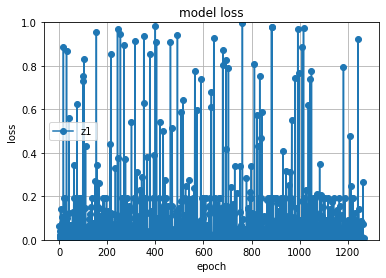

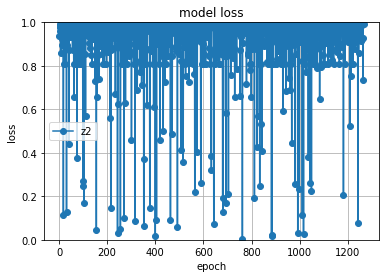

In [47]:
plt.plot(range(1, 1266+1), df_prelist.iloc[:, 0], "-o")
#plt.plot(range(1, NUM_EPOCHS+1), df3['val_loss'], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['z1'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
plt.ylim(0.0,1.0)
plt.show()

plt.plot(range(1, 1266+1), df_prelist.iloc[:, 1], "-o")
#plt.plot(range(1, NUM_EPOCHS+1), df3['val_loss'], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['z2'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
plt.ylim(0.0,1.0)
plt.show()

In [19]:
for i in [17, 30, 102, 154, 214, 242, 254, 269, 315, 351, 376, 399, 404, 462, 491, 642, 679, 681, 693, 761, 811, 882, 884, 991, 1010, 1015, 1241]:
    print(spro_eight_aa_list[i])

LTTRTQLP
SFTRGVYY
GWIFGTTL
SEFRVYSS
DLPQGFSA
ALHRSYLT
SSGWTAGA
LQPRTFLL
SNFRVQPT
AWNRKRIS
FKCYGVSP
FVIRGDEV
DEVRQIAP
PFERDIST
LQSYGFQP
FQTRAGCL
SPRRARSV
RRARSVAS
AYTMSLGA
QLNRALTG
PSKRSFIE
TSGWTFGA
GWTFGAGA
QIDRLITG
QLIRAAEI
AEIRASAN
SCLKGCCS
